In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob, os
import seaborn as sns

from scipy.stats import ttest_rel, pearsonr
from PIL import Image

### Image ratio boxplot analysis

In [3]:
images_metadata_dataframe = pd.read_csv("./images_metadata.csv")
images_metadata_dataframe["image_ratio"] = images_metadata_dataframe["image_width"] / images_metadata_dataframe["image_height"]
filenames = images_metadata_dataframe["filename"].unique()

In [19]:
unique_filenames_and_image_ratio_df = images_metadata_dataframe[
    ["filename", "image_ratio"]
].drop_duplicates("filename").reset_index(drop=True)

In [21]:
image_ratios = unique_filenames_and_image_ratio_df["image_ratio"]

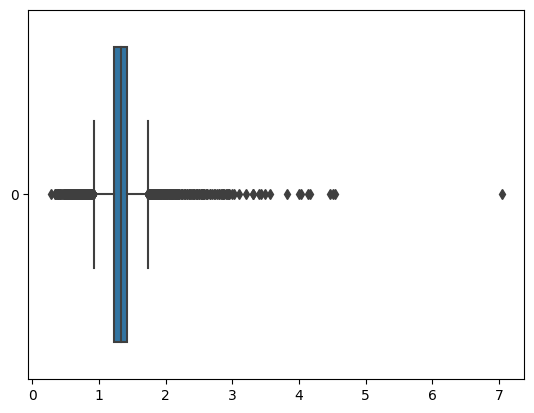

In [26]:
sns.boxplot(data=image_ratios, orient="h")
plt.show()

### Min, Max, outliers

In [27]:
image_ratios = pd.Series(image_ratios, name="image_ratio")

In [28]:
image_ratios_describe = image_ratios.describe()
print(image_ratios_describe)

count    17125.000000
mean         1.248242
std          0.316874
min          0.284000
25%          1.225490
50%          1.333333
75%          1.428571
max          7.042254
Name: image_ratio, dtype: float64


In [29]:
v25 = image_ratios_describe[4]
v75 = image_ratios_describe[6]
iqr = 1.5 * (v75 - v25)
min_ratio_in_acceptable_range = v25 - iqr
max_ratio_in_acceptable_range = v75 + iqr
number_of_outliers = sum((image_ratios < min_ratio_in_acceptable_range) | (image_ratios > max_ratio_in_acceptable_range))
outliers_percentage = number_of_outliers / len(image_ratios)
print(f"boxplot number of outliers:{number_of_outliers}, outliers percentage:{outliers_percentage}")

boxplot number of outliers:3957, outliers percentage:0.23106569343065694


In [30]:
num_low_outliers = sum(image_ratios < min_ratio_in_acceptable_range)
num_high_outliers = sum(image_ratios > max_ratio_in_acceptable_range)
print(f'''low outliers percentage:{num_low_outliers/len(image_ratios)}, 
number of low outliers:{num_low_outliers},
high outliers percentage:{num_high_outliers/len(image_ratios)},
number of high outliers:{num_high_outliers},
''')

low outliers percentage:0.21354744525547445, 
number of low outliers:3657,
high outliers percentage:0.017518248175182483,
number of high outliers:300,



### Image ratios on objects

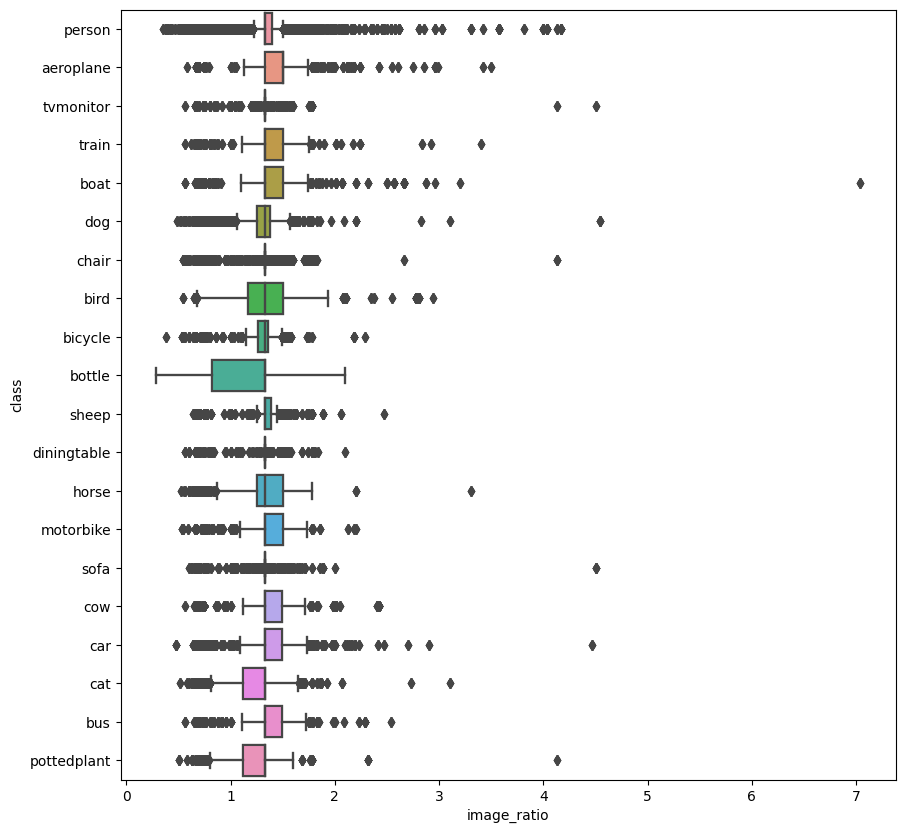

In [34]:
sns.boxplot(x="image_ratio", y="class", data=images_metadata_dataframe)
plt.show()

In [35]:
class_names = images_metadata_dataframe["class"].unique()
class_names_dict = {}
for class_name in class_names:
    image_ratios = images_metadata_dataframe[images_metadata_dataframe["class"] == class_name]["image_ratio"]
    image_ratios_describe = image_ratios.describe()
    v25 = image_ratios_describe[4]
    v75 = image_ratios_describe[6]
    iqr = 1.5 * (v75 - v25)
    min_ratio_in_acceptable_range = v25 - iqr
    max_ratio_in_acceptable_range = v75 + iqr
    low_outliers = image_ratios[image_ratios < min_ratio_in_acceptable_range]
    high_outliers = image_ratios[image_ratios > max_ratio_in_acceptable_range]
    num_low_outliers = len(low_outliers)
    num_high_outliers = len(high_outliers)
    class_names_dict[class_name] = {"low_outliers_percentage":num_low_outliers/len(image_ratios),
                                    "high_outliers_percentage":num_high_outliers/len(image_ratios)}

In [36]:
ratio_outliers_in_every_class_df = pd.DataFrame(
    pd.DataFrame(class_names_dict).to_numpy().T, 
    columns=["low_outliers_percentage", "high_outliers_percentage"],
    index=class_names
)

In [37]:
ratio_outliers_in_every_class_df

,low_outliers_percentage,high_outliers_percentage
person,0.222056,0.073559
aeroplane,0.047904,0.051896
tvmonitor,0.182531,0.223964
train,0.107955,0.022727
boat,0.131256,0.049103
dog,0.211514,0.034418
chair,0.230039,0.200916
bird,0.051141,0.018883
bicycle,0.236559,0.211470
bottle,0.000000,0.000000
